<div style="text-align:center">
    
# Lung Cancer Detection Through Deep Learning Image Analysis

### Mt. SAC CISB 62 Midterm Project Fall 2023

#### By
    
#### Paul Sandeen
    
</div>

## Introduction

Lung cancer is one of the most common forms of cancer worldwide. The primary risk factor is smoking tobacco cigarettes. There are two major types of lung cancer: Non-Small Cell Lung Cancer (NSCLC) which accounts for 85% of cases and Small Cell Lung Cancer (SCLC) which makes up the remaining 15%. There are different sub-types of NSCLC, with lung adenocarcinoma being the most common.

Under a microscope, adenocarcinoma tumors can appear as a solid mass or as mix of solid and gland-like structures.

This project uses a public image data set that contains image data with 10,000 lung cell images, 5,000 showing normal (negative for cancer) cells and 5,000 showing cells with adenocarcinoma (positive for cancer). Each image is a color 768 X 768 pixel JPEG file.

This Jupyter notebook shows a run using all 10,000 images scaled down to 128 pixel by 128 pixel images with three color channels (red, green, and blue).



## Intended Audience

This project is intended for students, educators, researchers and anyone interested in understanding how deep neural networks can be used to identify the presence of cancer in lung cells. Basic familiarity with the Python programming language is required; familiarity with the concepts of deep neural networks and their implementation in the Python libraries Kersas and TensorFlow is assumed.

## Materiels and Methods

This project uses the Python programming language running in the Anaconda environment. 

Associated Python data science libraries: Numpy, pandas, Matplotlib, Seaborn.

Associated Python deep learning libraries: TensorFlow and Keras.

The project was composed as a Jupyter Notebook.

A BitTorrent client (such as qBittorrent) is required to download the image data.

Microsoft PowerToys Image Resizer (to bulk re-size the length and width dimensions of the images). 


## Data Source

The image files used for this project:

“LC25000 Lung and colon histopathological image dataset”

Filename: LC25000.zip &emsp; Size: 1.89GB

https://academictorrents.com/details/7a638ed187a6180fd6e464b3666a6ea0499af4af


## Acquire the Necessary Software Packages

In [1]:
# Import the Python file manipulation libraries
import os
import shutil
import glob

In [2]:
# Import random for random numbers
import random

In [3]:
# Import the Python Data Science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import the Python scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [5]:
# Import the Python deep learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
import keras_tuner as kt 
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization

## Load the Image Data Set

In [6]:
# Set the directory paths for the image data
cancer_dir = "data/lung_aca"
no_cancer_dir = "data/lung_n"

In [7]:
# Create Python List objects to store the files and labels
file_paths = []
labels = []

In [8]:
# Load images with cancer (label=1)
cancer_files = glob.glob(os.path.join(cancer_dir, "*.jpeg")) 
file_paths.extend(cancer_files)
labels.extend([1] * len(cancer_files)) 

In [9]:
# Load images with no cancer (label=0)
no_cancer_files = glob.glob(os.path.join(no_cancer_dir, "*.jpeg"))
file_paths.extend(no_cancer_files)
labels.extend([0] * len(no_cancer_files))

## Exploratory Data Analysis (EDA)

#### Combine the image data from separate directories

In [10]:
# Combine the image file paths and labels into a list of (path, label) pairs
data = list(zip(file_paths, labels))

#### Randomly shuffle the image data

In [11]:
# Randomly shuffle the zipped list
random.shuffle(data)

In [12]:
# Divide the data between the X_shuffled and y_shuffled
X_shuffled, y_shuffled = zip(*data)

#### Display a sample of the image data

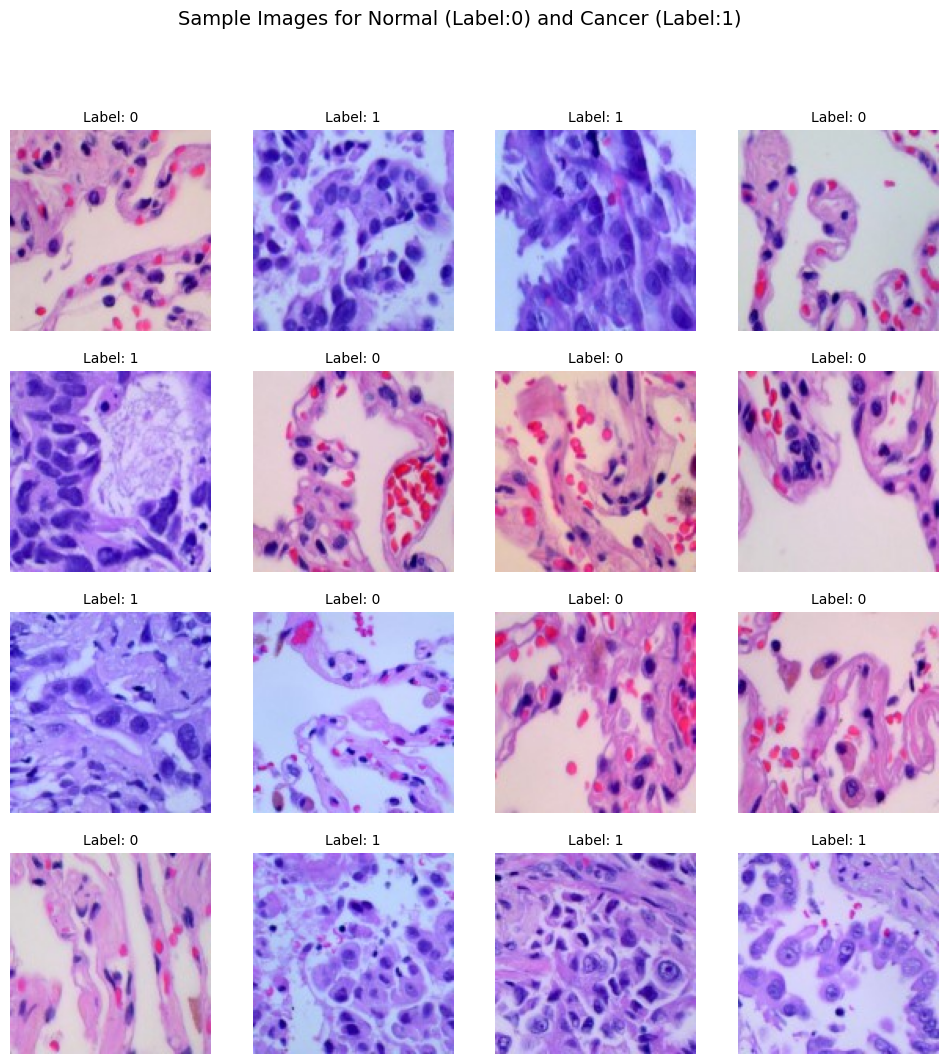

In [13]:
# Display sample images in a 4 X 4 grid
num_rows, num_cols = 4, 4

# Create a Matplotlib figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Iterate through the grid and display images
for ax, (image_path, label) in zip(axes.flat, zip(X_shuffled, y_shuffled)):
    # Load the images
    img = np.array(plt.imread(image_path))

    # Place the image in the current grid cell
    ax.imshow(img)
    ax.set_title(f"Label: {label}", fontsize=10)
    ax.axis('off')  # Turn off the axis labels

# Add a title to the overall plot
plt.suptitle("Sample Images for Normal (Label:0) and Cancer (Label:1)", fontsize=14)

# Show sample images
plt.show()


#### Divide the image data into training and testing data sets

In [14]:
# Split the shuffled data into training and test sets, 20% training set
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=42)

#### Determine the pixel dimensions (height and width) of the image data and the number of color (RGB) channels

In [15]:
# Determine the image height, width and number of channels
# Select a sample image from your dataset
sample_image_path = file_paths[0]  # Change the index to select a different image

# Load the sample image
sample_image = plt.imread(sample_image_path)

# Get the dimensions of the sample image
image_height, image_width, num_channels = sample_image.shape

print("Image Information:")
print(f"Number of images: {len(data):,}")
print(f"Height: {image_height} pixels, width: {image_width} pixels, number of channels: {num_channels}")

Image Information:
Number of images: 10,000
Height: 128 pixels, width: 128 pixels, number of channels: 3


## Applying Deep Learning techniques

#### Design the Artificial Neural Network (ANN) Architecture - Create a Keras Sequential model

In [16]:
# Create a Sequential model
model = keras.Sequential([
    layers.Input(shape=(image_height, image_width, num_channels)),     # Image size is 768 X 768 with 3 channels
    layers.Flatten(),                                                  # Flatten the layer for dense layer compatability 
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')                              # Sigmoid activation for binary classification
])


In [17]:
# The model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 32)                1572896   
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1573441 (6.00 MB)
Trainable params: 1573441 (6.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# Compile the model
# Use the 'adam' optimizer for the adaptive learning rate
# Use 'binary_crossentropy for loss since this is a binary classification problem
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [19]:
# Prepare the labeled data
X_train = np.array([plt.imread(image_path) for image_path in X_train]) / 255.0
X_test = np.array([plt.imread(image_path) for image_path in X_test]) / 255.0
y_train = np.array(y_train)
y_test = np.array(y_test)


#### Fit (train) the model

In [20]:
# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/5
500/500 [==============================] - 37s 69ms/step - loss: 0.2981 - accuracy: 0.9287 - val_loss: 0.0961 - val_accuracy: 0.9675
Epoch 2/5
500/500 [==============================] - 31s 62ms/step - loss: 0.1582 - accuracy: 0.9524 - val_loss: 0.0902 - val_accuracy: 0.9675
Epoch 3/5
500/500 [==============================] - 31s 62ms/step - loss: 0.1178 - accuracy: 0.9613 - val_loss: 0.1029 - val_accuracy: 0.9690
Epoch 4/5
500/500 [==============================] - 32s 64ms/step - loss: 0.1461 - accuracy: 0.9513 - val_loss: 0.1370 - val_accuracy: 0.9705
Epoch 5/5
500/500 [==============================] - 33s 65ms/step - loss: 0.1075 - accuracy: 0.9641 - val_loss: 0.1476 - val_accuracy: 0.9425


#### Visualize the Training Loss and Validation Loss over training epochs for the ANN model

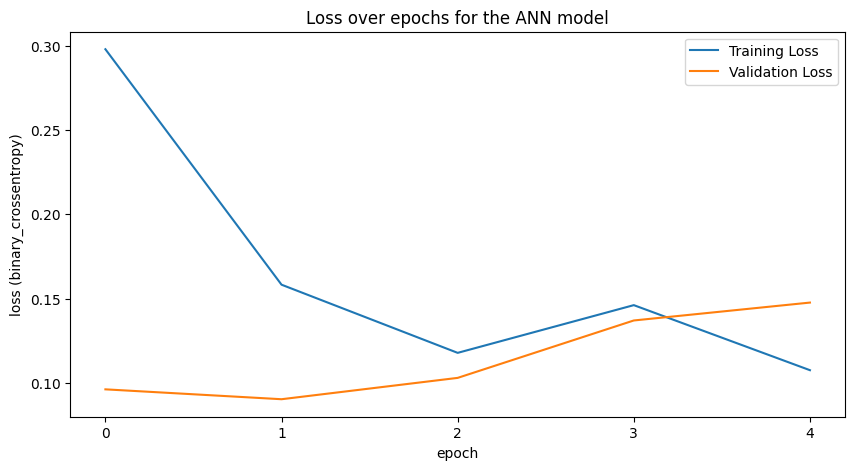

In [21]:
# Plot the model loss
plt.figure(figsize=(10,5))
plt.plot(model.history.history['loss'][:])
plt.plot(model.history.history['val_loss'][:])
plt.title('Loss over epochs for the ANN model')
plt.xlabel('epoch')
plt.xticks(np.arange(0, 5, 1))
plt.ylabel('loss (binary_crossentropy)')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')

<b>Interpretation:</b> The expected trend is to see loss (as measured using binary_crossentropy) to decrease over the epochs; this is the trend seen here although there may be an increase in loss in the middle epochs since the model is not tuned.

#### Visualize the model accuracy over the training epochs

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


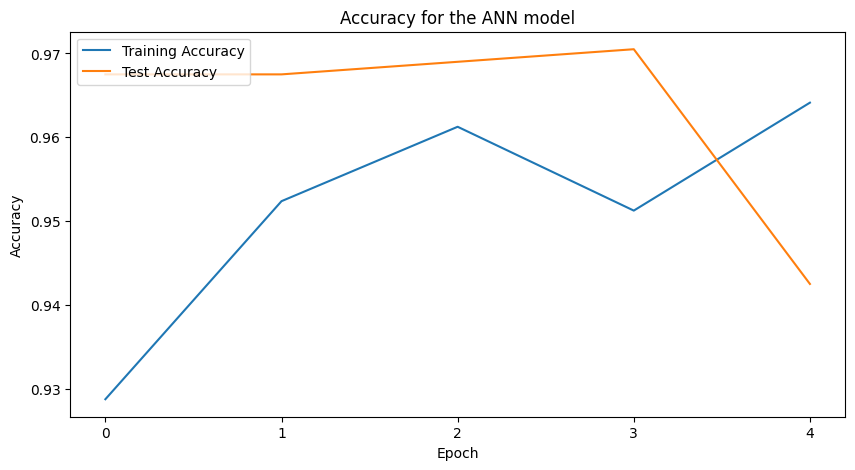

In [22]:
# Plot of accuracy changing during Fit/Train Phase
plt.figure(figsize=(10,5))
plt.plot(model.history.history['accuracy'][:])
plt.plot(model.history.history['val_accuracy'][:])
plt.title('Accuracy for the ANN model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper left')
plt.xticks(np.arange(0, 5, 1))
print(model.history.history.keys())

<b>Interpretation:</b> The expected trend is to see accuracy of the model increase over the training epochs, and this trend is seen in the plot showing that the model accuracy improves given more training epochs.

#### Evaluate the model predictive performance using the Confusion Matrix

63/63 [==============================] - 1s 11ms/step


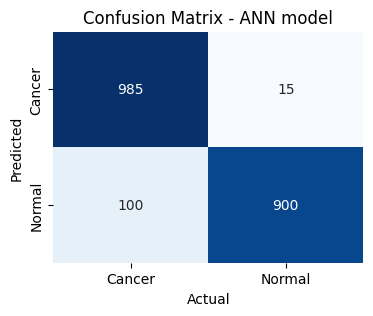

In [23]:
# Create a confusion matrix for the actual and predicted values

y_true = np.array(y_test)
y_pred = np.round(model.predict(X_test))

cm = confusion_matrix(y_true, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Cancer", "Normal"],
            yticklabels=["Cancer", "Normal"])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix - ANN model")
plt.show()


<b>Interpretation:</b> The best result would see all model predictions result in True Positives and all True Negatives, with no False Positives and No False Negatives.

#### Tuning ANN Hyperparameters

In [24]:
# Create a folder path for Hyperparameter tuning
folder_path = "my_dir/intro_to_kt/"

In [25]:
# Remove any existing log files if they exist
if os.path.exists(folder_path):
    # Remove the folder and its contents recursively
    shutil.rmtree(folder_path)
    print(f"The folder '{folder_path}' has been deleted.")
else:
    print(f"The folder '{folder_path}' does not exist.")

The folder 'my_dir/intro_to_kt/' has been deleted.


<b>Two hyperparameters are being tuned </b>: 

(1)	The number of ‘units’ (neurons) in the dense layers; for the first hidden layer dense_units_1 is searched for values 24, 28 or 32. The second hidden layer dense_units_2 is searched for 8, 12 or 16.  

(2)	The learning rate is searched for the values 0.01, 0.001 or 0.0001.


In [26]:
# Create a model-building function
def model_builder(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(image_height, image_width, num_channels)))  
    model.add(layers.Flatten())
    model.add(layers.Dense(units=hp.Int('dense_units_1', min_value=24, max_value=32, step=4),
                         activation='relu'))
    model.add(layers.Dense(units=hp.Int('dense_units_2', min_value=8, max_value=16, step=4),
                         activation='relu'))


    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [27]:
# For the image data, the RandomSearch tuner performed better than the Hyperband tuner.
tuner = RandomSearch(
    model_builder,
    objective='val_accuracy',
    max_trials=10,
    directory='my_dir',
    project_name='intro_to_kt')

In [28]:
# Since we are using only 5 epochs, do not use 'stop early'
# stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [29]:
# Search the hyperparameters to see which combination provides the best model performance
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Trial 10 Complete [00h 01m 51s]
val_accuracy: 0.9700000286102295

Best val_accuracy So Far: 0.9714999794960022
Total elapsed time: 00h 19m 46s
INFO:tensorflow:Oracle triggered exit


In [30]:
# Retrieve the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [31]:
# Display the optimal hyperparameters
print(f"The hyperparameter search is complete.")
print(f"The optimal number of units in the first densely-connected layer is {best_hps.get('dense_units_1')}.")
print(f"The optimal number of units in the second densely-connected layer is {best_hps.get('dense_units_2')}.")

The hyperparameter search is complete.
The optimal number of units in the first densely-connected layer is 24.
The optimal number of units in the second densely-connected layer is 16.


#### Build the final model using the optimal hyperparameters

In [32]:
# Create the final model based on the optimal hyperparameters
final_model = tuner.hypermodel.build(best_hps)

In [33]:
# Fit the optimized model
history = final_model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
250/250 [==============================] - 26s 98ms/step - loss: 0.2898 - accuracy: 0.9140 - val_loss: 0.1034 - val_accuracy: 0.9690
Epoch 2/5
250/250 [==============================] - 14s 55ms/step - loss: 0.1349 - accuracy: 0.9580 - val_loss: 0.1280 - val_accuracy: 0.9700
Epoch 3/5
250/250 [==============================] - 14s 55ms/step - loss: 0.1251 - accuracy: 0.9600 - val_loss: 0.0965 - val_accuracy: 0.9645
Epoch 4/5
250/250 [==============================] - 14s 55ms/step - loss: 0.1146 - accuracy: 0.9609 - val_loss: 0.0891 - val_accuracy: 0.9690
Epoch 5/5
250/250 [==============================] - 14s 55ms/step - loss: 0.1019 - accuracy: 0.9647 - val_loss: 0.0832 - val_accuracy: 0.9695


In [34]:
# Find the best epoch
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 2


In [35]:
# Evaluate the model
eval_result = final_model.evaluate(X_train, y_train)
print("[test loss, test accuracy]:", eval_result)


250/250 [==============================] - 3s 11ms/step - loss: 0.0797 - accuracy: 0.9697
[test loss, test accuracy]: [0.07965175807476044, 0.9697499871253967]


#### Visualize the Training Loss and Validation Loss over training epochs for the tuned ANN model

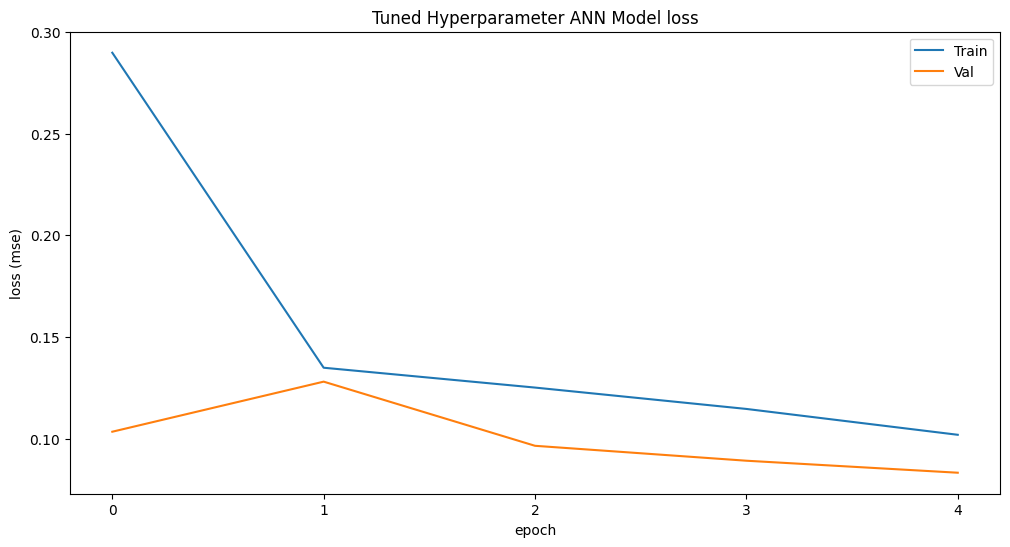

In [36]:
# Plot the tuned model loss
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'][:])
plt.plot(history.history['val_loss'][:])
plt.title('Tuned Hyperparameter ANN Model loss')
plt.xlabel('epoch')
plt.xticks(np.arange(0, 5, 1))
plt.ylabel('loss (mse)')
plt.legend(['Train', 'Val'], loc='upper right')

<b>Interpretation:</b> The expected trend is to see loss (as measured using binary_crossentropy) to reach an optimal stage more quickly after tuning.

#### Visualize the model accuracy over the training epochs for the tuned ANN model

dict_keys([])


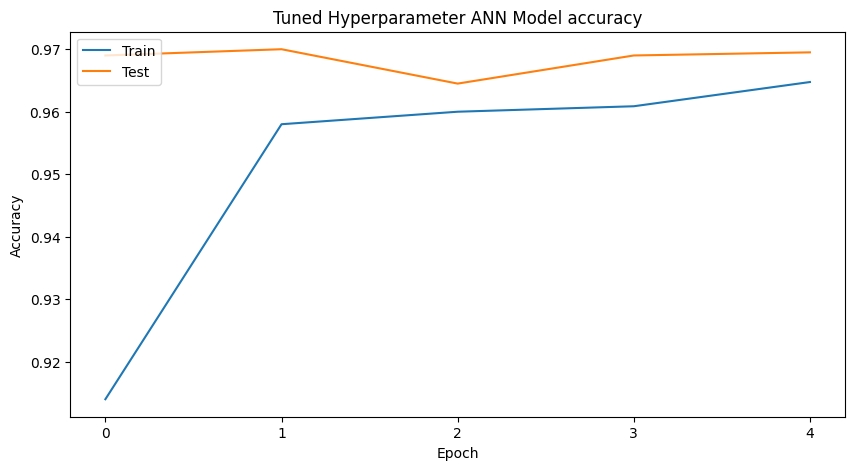

In [37]:
# Plot of accuracy changing during Fit/Train Phase
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'][:])
plt.plot(history.history['val_accuracy'][:])
plt.title('Tuned Hyperparameter ANN Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.xticks(np.arange(0, 5, 1))
print(model.history.history.keys())

<b>Interpretation:</b> The expected trend is to see a high level of accuracy achieved quickly after model tuning.

#### Evaluate the model predictive performance using the Confusion Matrix after model tuing

63/63 [==============================] - 1s 10ms/step


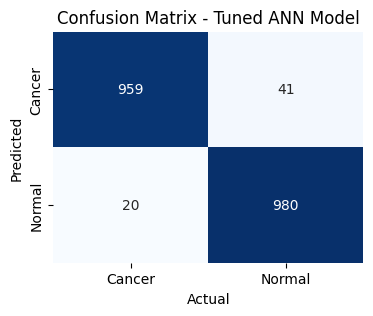

In [38]:
# Create a confusion matrix for the actual and predicted values

y_true = np.array(y_test)
y_pred = np.round(final_model.predict(X_test))

cm = confusion_matrix(y_true, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Cancer", "Normal"],
            yticklabels=["Cancer", "Normal"])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix - Tuned ANN Model")
plt.show()

<b>Interpretation:</b> The best result would see an improvement in the tuned model performance by seeing no False Positives and no False Negatives.

## Design the Convolutional Neural Network (CNN) Architecture

#### Create an AlexNet-like Keras Convolutional Neural Network

In [39]:
model = Sequential()

# The first convolutional network: 
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)))

model.add(BatchNormalization())

# Add MaxPooling2D to reduce computational complexity.
model.add(MaxPooling2D(pool_size=(2, 2)))



# The second convolutional network: 
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))

model.add(BatchNormalization())

# Add MaxPooling2D to reduce computational complexity.
model.add(MaxPooling2D(pool_size=(2, 2)))



# The third convolutional network: 
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(BatchNormalization())

# Add MaxPooling2D to reduce computational complexity.
model.add(MaxPooling2D(pool_size=(2, 2)))



# Flatten converts the three-dimmensional activation map output by conv2D() to a 1-dimensional array
# This enables us to feed the activations as inputs into a Dense layer, which can only accept one-dimensional arrays
model.add(Flatten())

# Dense hidden layer with 128 neurons
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.25))

# Output layer
model.add(Dense(1, activation='sigmoid'))

In [40]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
# Display the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 8)       224       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 8)       32        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 16)        1168      
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 16)        64        
 chNormalization)                                                
                                                      

#### Fit (train) the CNN model.

In [42]:
# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
250/250 [==============================] - 147s 573ms/step - loss: 0.1098 - accuracy: 0.9697 - val_loss: 0.8729 - val_accuracy: 0.7875
Epoch 2/5
250/250 [==============================] - 137s 547ms/step - loss: 0.0410 - accuracy: 0.9862 - val_loss: 0.1004 - val_accuracy: 0.9735
Epoch 3/5
250/250 [==============================] - 136s 543ms/step - loss: 0.0169 - accuracy: 0.9944 - val_loss: 0.0106 - val_accuracy: 0.9960
Epoch 4/5
250/250 [==============================] - 137s 547ms/step - loss: 0.0096 - accuracy: 0.9976 - val_loss: 0.0090 - val_accuracy: 0.9980
Epoch 5/5
250/250 [==============================] - 137s 548ms/step - loss: 0.0429 - accuracy: 0.9901 - val_loss: 0.0200 - val_accuracy: 0.9930


#### Visualize the Training Loss and Validation Loss over training epochs for the Convolutional Neural Network (CNN) model

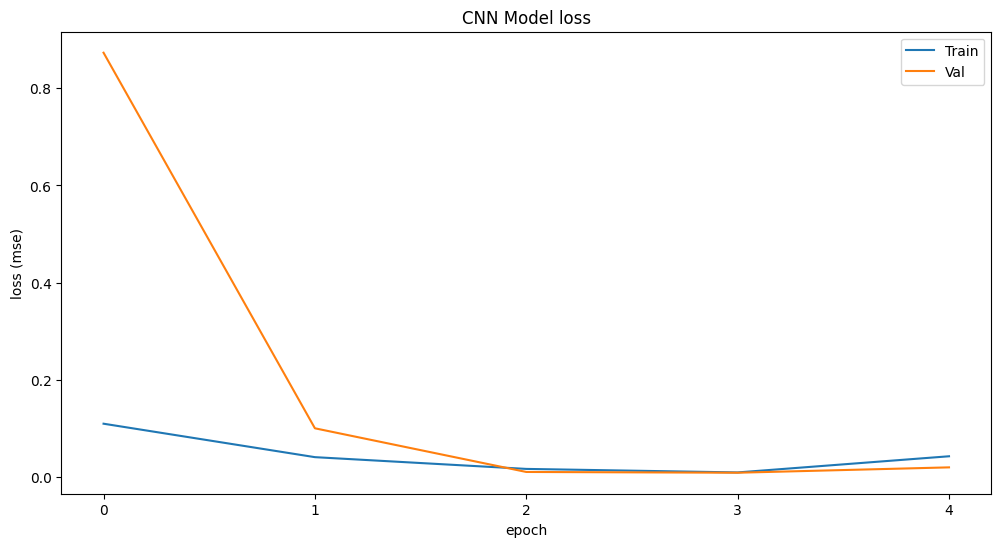

In [43]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'][:])
plt.plot(history.history['val_loss'][:])
plt.title('CNN Model loss')
plt.xlabel('epoch')
plt.xticks(np.arange(0, 5, 1))
plt.ylabel('loss (mse)')
plt.legend(['Train', 'Val'], loc='upper right')

<b>Interpretation:</b> The CNN model should achieve lower loss than the ANN model.

#### Visualize the Model Accuracy over training epochs for the Convolutional Neural Network (CNN) model

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


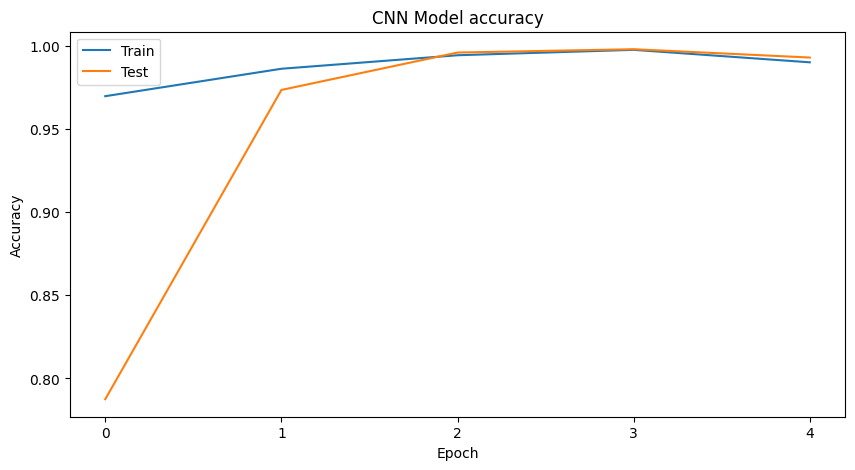

In [44]:
# Plot of accuracy changing during Fit/Train Phase
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'][:])
plt.plot(history.history['val_accuracy'][:])
plt.title('CNN Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.xticks(np.arange(0, 5, 1))
print(model.history.history.keys())

<b>Interpretation:</b> The CNN model should achieve higher accuracy than the ANN model.

#### Evaluate the model predictive performance using the Confusion Matrix for CNN

63/63 [==============================] - 10s 157ms/step


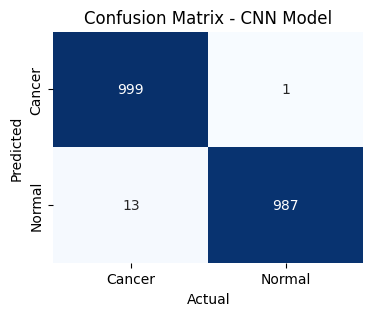

In [45]:
# Create a confusion matrix for the actual and predicted values

y_true = np.array(y_test)
y_pred = np.round(model.predict(X_test))

cm = confusion_matrix(y_true, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Cancer", "Normal"],
            yticklabels=["Cancer", "Normal"])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix - CNN Model")
plt.show()

<b>Interpretation:</b> The CNN model should achieve a higher rate for True Positives and True Negatives, and a lower rate of False Positives and False Negatives than the ANN model.

## Summary and conclusion

When dealing with a “serious” application of image data analysis, it is important to use techniques that provide the most optimal predictive performance in terms of accuracy and timeliness, as well as take into account limitations of the compute resources available.
For this Jupyter notebook, all 10,000 images in the data set were used, but were scaled to 128 pixel X 128 pixel dimensions in order to accelerate processing time on available hardware.

Using an un-tuned ANN, out of the 2,000 images in the test data set, there were 15 False Positives and 100 False Negatives. The number of False Negatives (100/2000, or 5%) was the highest of the three models. This may be due to overfitting.

For the tuned ANN, out of the 2,000 images in the test data set, there were 41 False Positives and 20 False Negatives. The number of False Negatives (20/2000, or 1%) was an improvement over the un-tuned ANN, so tuning seems to reduce overfitting.

For the CNN, out of the 2,000 images in the test data set, there was 1 False Positive and 13 False Negatives. The number of False Negatives (13/2000, or 0.65%) was the best of the three models.

The CNN provided the best model accuracy performance for the scenario of using 10,000 128X128 pixel data set images, but the best model (CNN) still predicted 13 patients out of 2,000 were healthy when in fact they had cancer. However, the overall accuracy of 1,986 correctly classified images out of 2000 test images (99.3% accuracy) is high.

Several combinations of image dimensions and the number of images were attempted, and using the full image set of 10,000 images reduced to 128X128 pixels produced the highest accuracy and lowest number of False Positives.  Included with this project under the directory ‘other_runs’ is this notebook run with 200 images at the full size of 768x768 pixels, which produced poor results.
